## Adult Income Analysis Using K-Nearest Neighbour Classifier

## Table of Content

  ###  1. What is  K-Nearest Neighbour Classifier?
  ###  2. Importing Libraries
  ###  3. Loading Dataset
  ###  4. Data PreProcessing
  ###  5. Feature Scaling
  ###  6. EDA
  ###  7. Data Splitting
  ###  8. Model Selection and Training
  ###  9. Model Evaluation
  ### 10. Conclusion

## 1. What is K-Nearest Neighbour Classifier?

### K-Nearest Neighbor (KNN) is a simple yet powerful supervised machine learning algorithm used for classification and regression. It is a non-parametric algorithm that makes predictions based on the similarity (distance) between new data points and the data points in the training set.

### In the KNN algorithm, the value of K (a positive integer) is chosen by the user. When a new data point is presented for classification, the algorithm finds the K nearest data points in the training set based on their distance to the new point. The distance between two data points can be measured using different distance metrics such as Euclidean distance or Manhattan distance.

### After finding the K nearest neighbors, the algorithm takes the majority vote of their classes as the predicted class for the new data point in the case of classification, and the mean or median value of their target values in the case of regression.

### KNN is easy to implement and can work well with non-linear decision boundaries. However, it can be computationally expensive for large datasets and sensitive to irrelevant features or noisy data.

![](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

### The K-NN working can be explained on the basis of the below algorithm:

    Step-1: Select the number K of the neighbors
    Step-2: Calculate the Euclidean distance of K number of neighbors
    Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
    
![](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning4.png)

    Step-4: Among these k neighbors, count the number of the data points in each category.
    Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
    Step-6: Our model is ready.

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

## 3. Loading Dataset

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## 4. Data PreProcessing

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
data.shape

(48842, 15)

In [7]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [9]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [10]:
# remove the some unnecessary features

del data['fnlwgt']
del data['educational-num']
del data['race']
del data['capital-gain']
del data['capital-loss']

In [11]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

### Label Encoding

In [12]:
label_encoder = preprocessing.LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['workclass'] = label_encoder.fit_transform(data['workclass'])
data['education'] = label_encoder.fit_transform(data['education'])
data['marital-status'] = label_encoder.fit_transform(data['marital-status'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['relationship'] = label_encoder.fit_transform(data['relationship'])
data['native-country'] = label_encoder.fit_transform(data['native-country'])
data['income'] = label_encoder.fit_transform(data['income'])

In [14]:
data['workclass'].unique()

array([4, 2, 0, 6, 1, 7, 5, 8, 3])

In [15]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,25,4,1,4,7,3,1,40,39,0
1,38,4,11,2,5,0,1,50,39,0
2,28,2,7,2,11,0,1,40,39,1
3,44,4,15,2,7,0,1,40,39,1
4,18,0,15,4,0,3,0,30,39,0


## 5. Feature Scalling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'gender', 'workclass', 'hours-per-week',
                                                          'education', 'native-country', 'income']],
                                                    data.age, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((34189, 7), (14653, 7))

In [17]:
scaler = RobustScaler()

X_train_scaled_ro = scaler.fit_transform(X_train) 
X_test_scaled_ro = scaler.transform(X_test)

In [21]:
print('Mean value of age, gender, workclass, hours-per-week, education, native-country, income features: ', X_train_scaled_ro.mean(axis=0))
print('Std value of age, gender, workclass, hours-per-week, education, native-country, income features: ', X_test_scaled_ro.std(axis=0))

Mean value of age, gender, workclass, hours-per-week, education, native-country, income features:  [ 0.08430636 -0.32978443 -0.12302202  0.08458861 -0.23606033 -2.23411039
  0.23902425]
Std value of age, gender, workclass, hours-per-week, education, native-country, income features:  [0.6809953  0.47218679 1.45448236 2.46027275 1.28451187 7.82316793
 0.42701165]


(array([11275.,     0.,     0.,     0.,     0.,     0.,     0., 22914.]),
 array([-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
         0.   ]),
 <BarContainer object of 8 artists>)

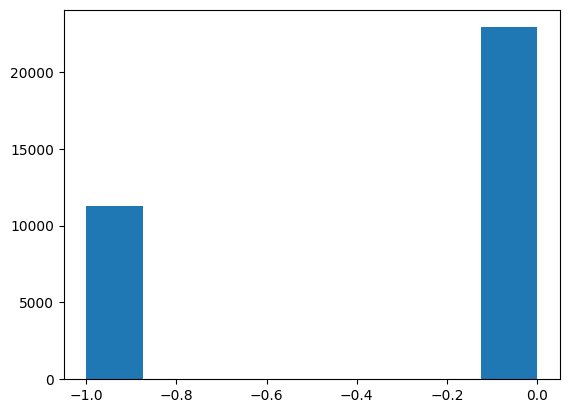

In [22]:
# the distribution of the transformed variable Age

plt.hist(X_train_scaled_ro[:,1], bins=8)

(array([1.9560e+03, 0.0000e+00, 1.0240e+03, 0.0000e+00, 0.0000e+00,
        2.1510e+03, 0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        2.3674e+04, 0.0000e+00, 1.1840e+03, 0.0000e+00, 0.0000e+00,
        2.7860e+03, 0.0000e+00, 1.3950e+03, 0.0000e+00, 1.4000e+01]),
 array([-4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,
         0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <BarContainer object of 20 artists>)

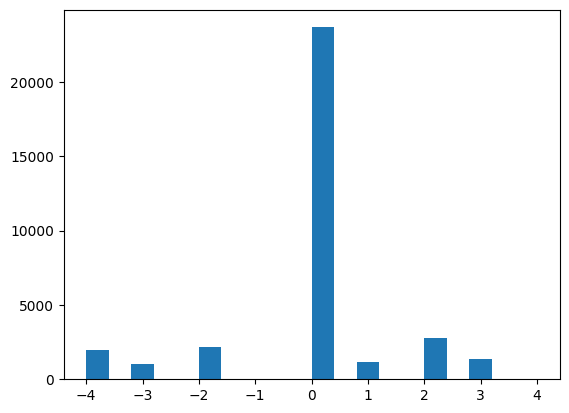

In [23]:
# the distribution of the transformed variable Fare

plt.hist(X_train_scaled_ro[:,2], bins=20)

## 6. EDA

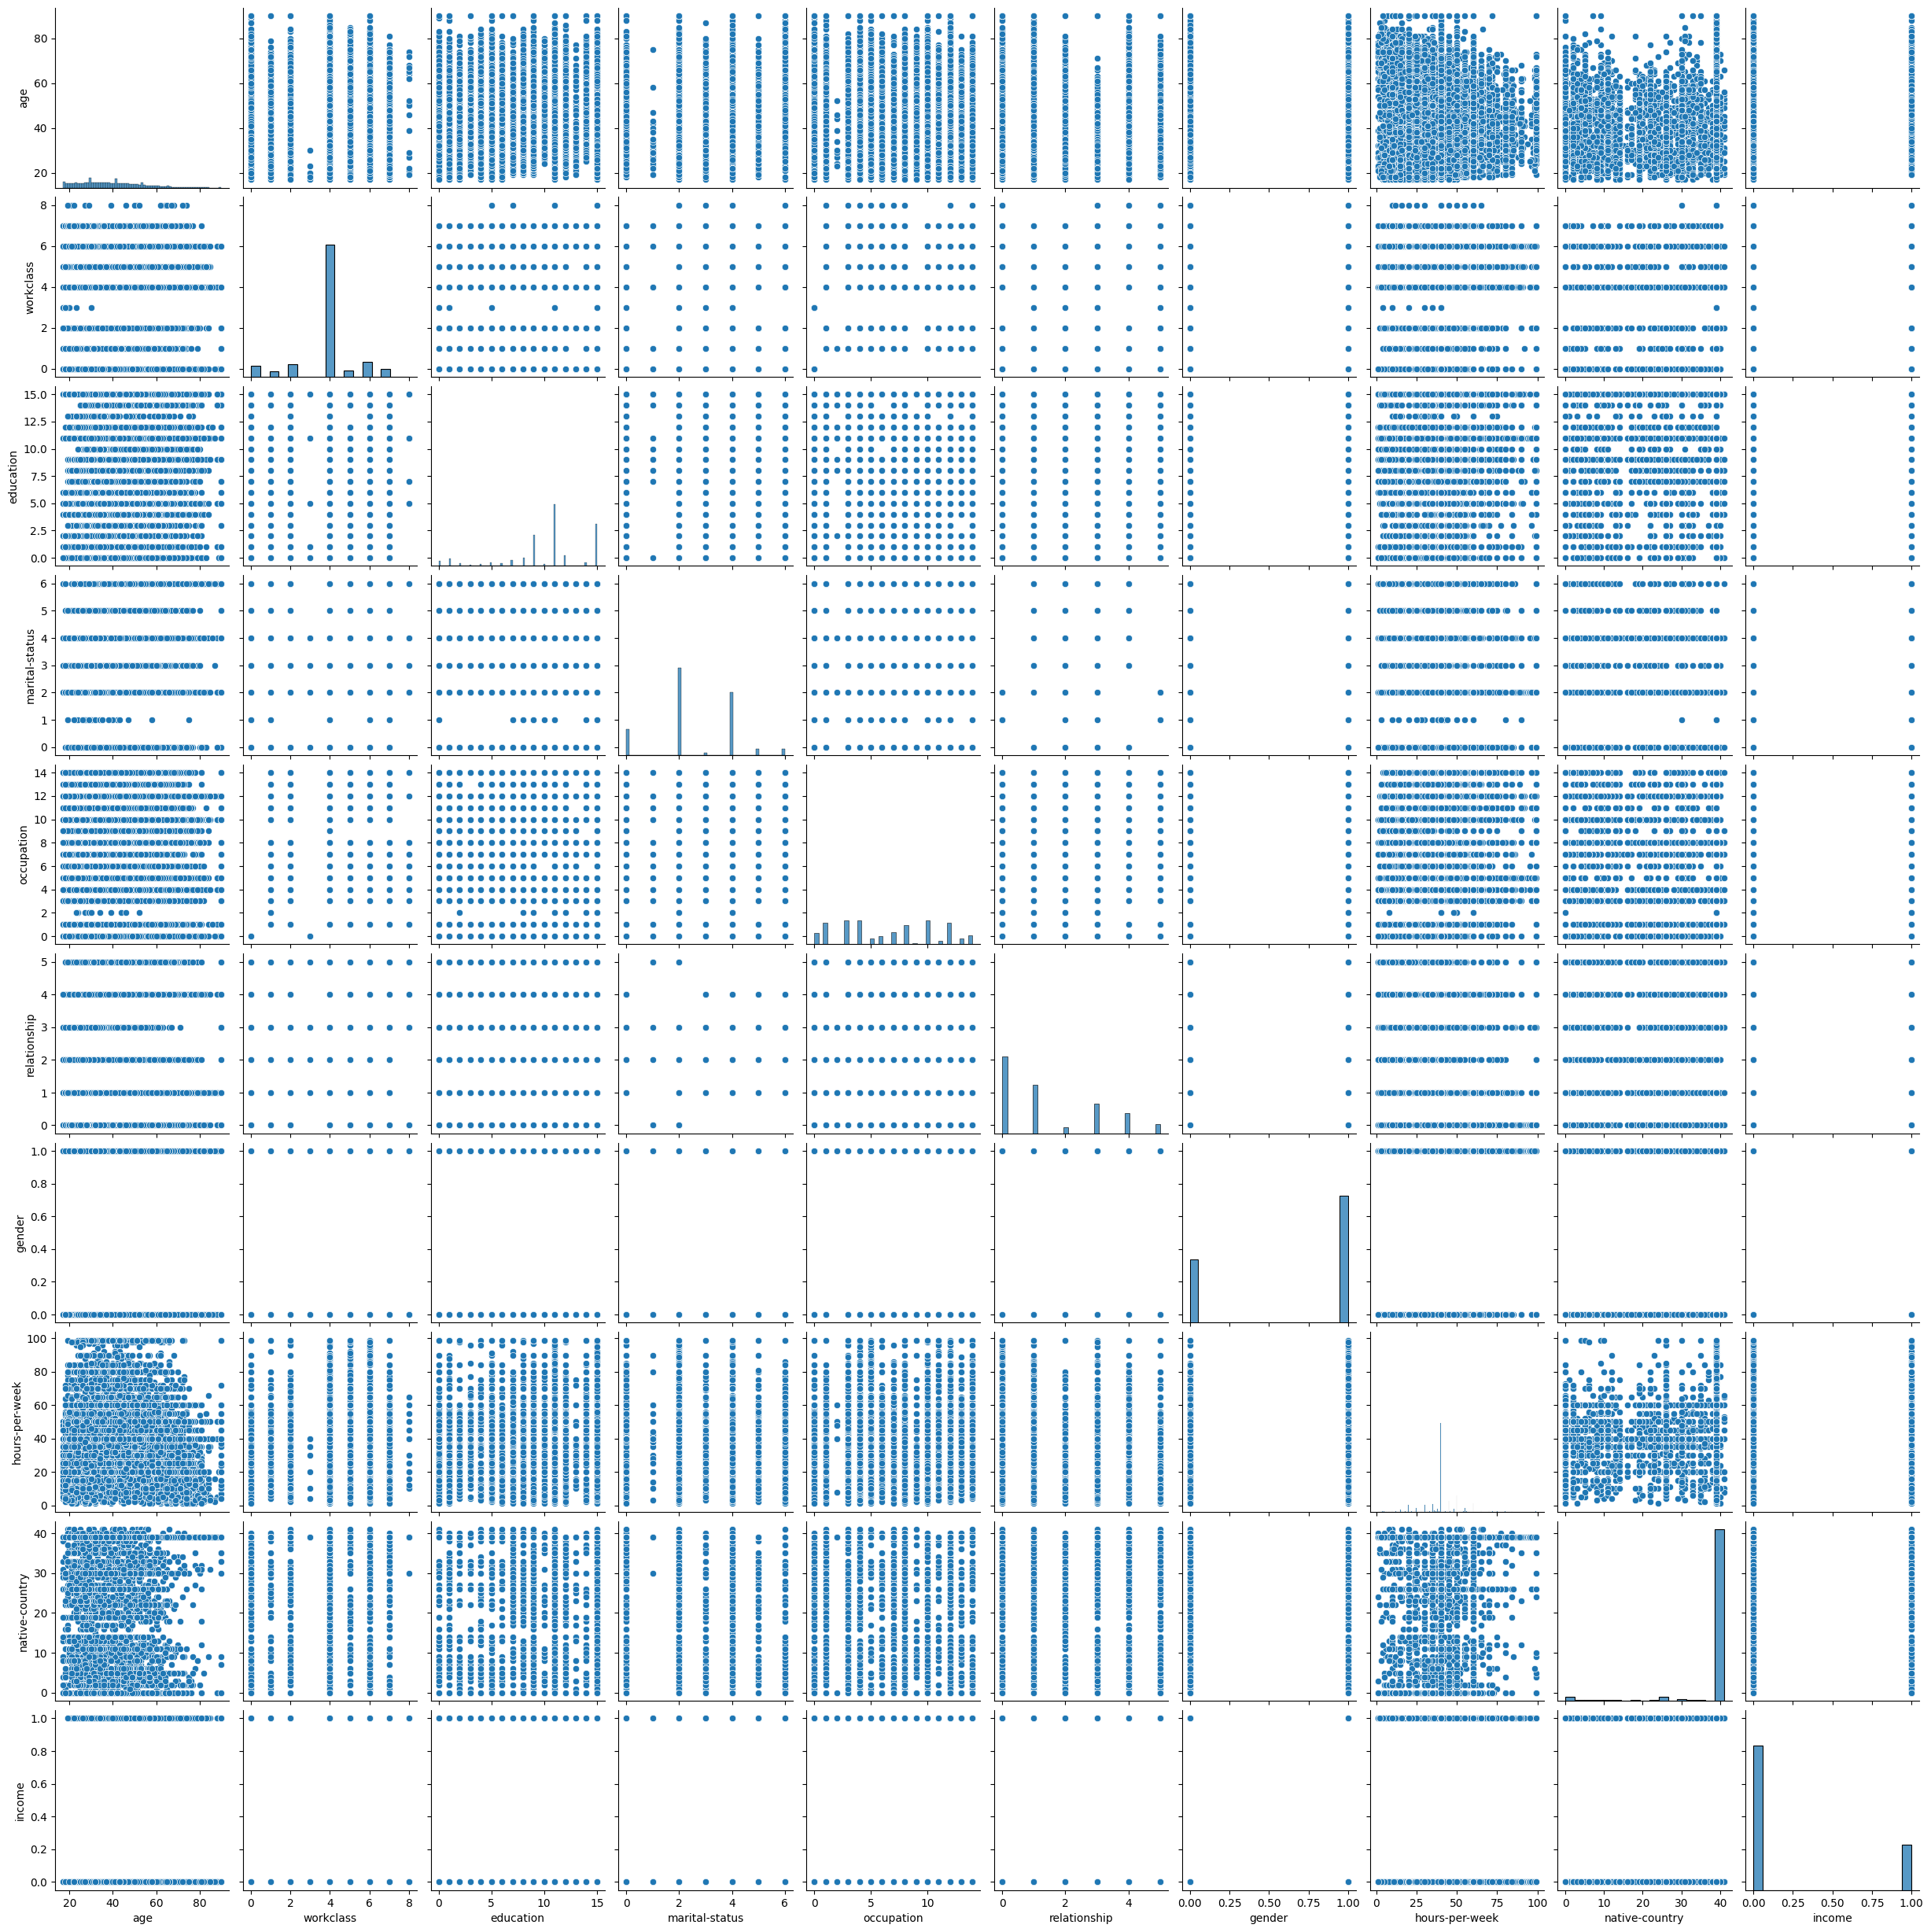

In [25]:
sns.pairplot(data)

### Workclass Distribution:

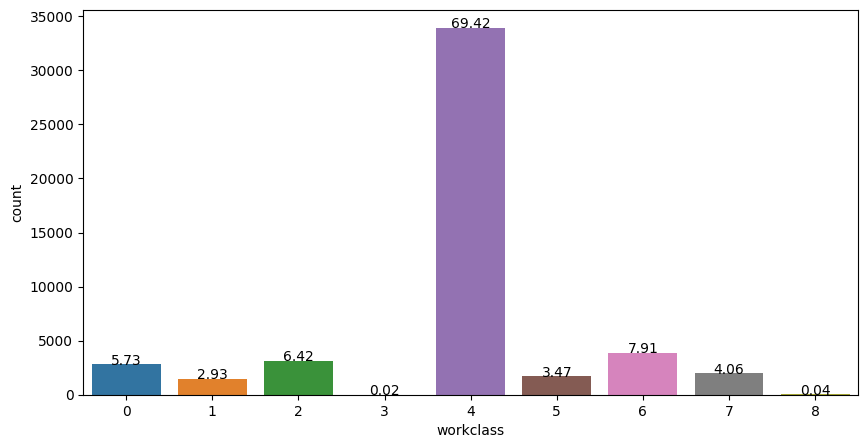

In [30]:
plt.figure(figsize=(10,5))

total = float(len(data['income']))

a = sns.countplot(x = 'workclass',data = data)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

In [62]:
data['workclass'].unique()

array([4, 2, 0, 6, 1, 7, 5, 8, 3])

In [63]:
data['workclass'].value_counts()

4    33906
6     3862
2     3136
0     2799
7     1981
5     1695
1     1432
8       21
3       10
Name: workclass, dtype: int64

    most of them belong to Workclass "4th" workclass that is around 69.42%.

### Education Distribution:

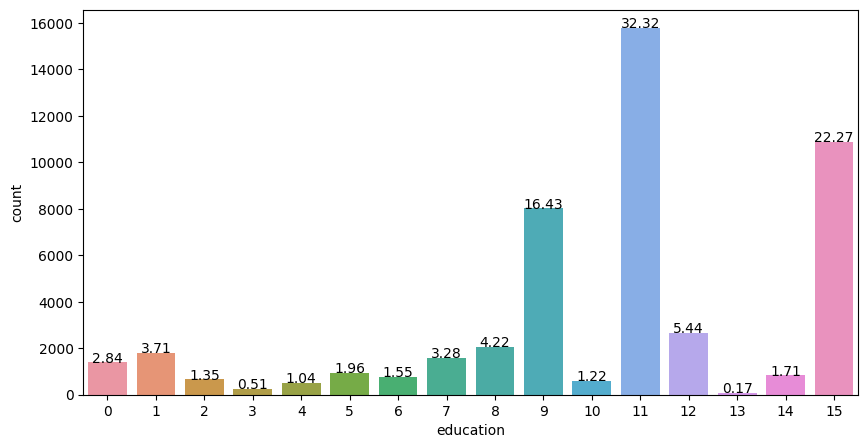

In [33]:
plt.figure(figsize=(10,5))

a = float(len(['income']))

a = sns.countplot(x='education',data = data)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

### Occupation Distribution:

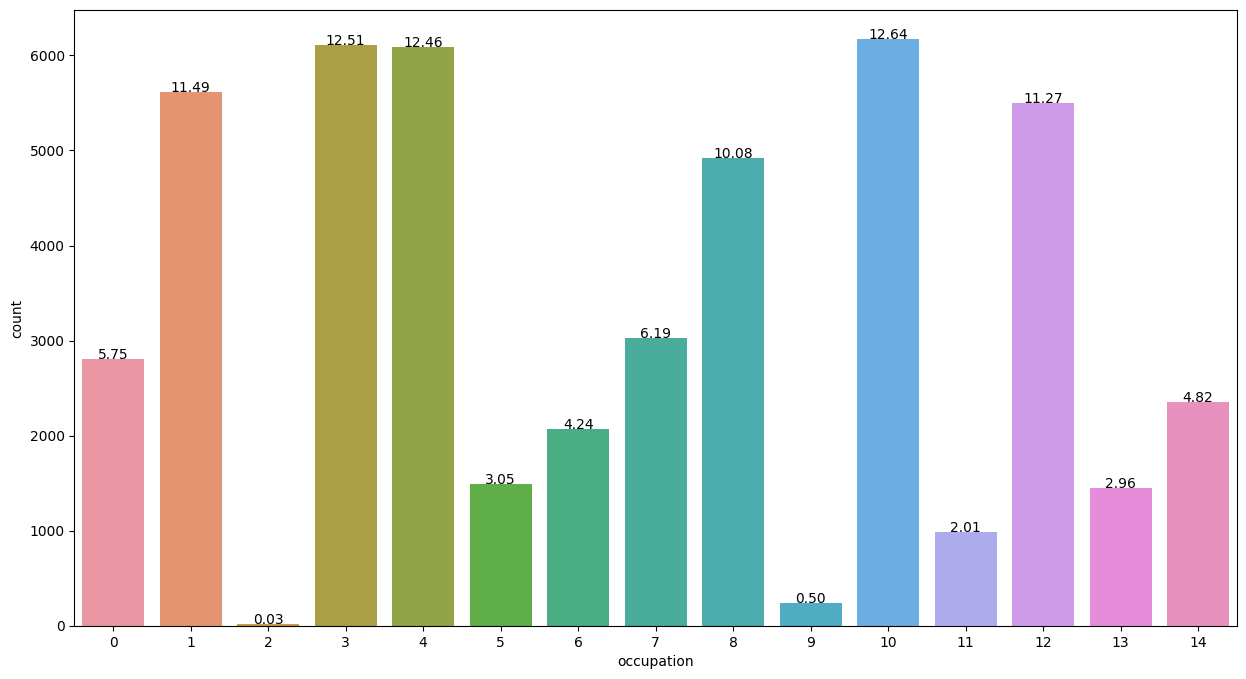

In [34]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x = "occupation", data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [70]:
data['occupation'].unique()

array([ 7,  5, 11,  0,  8, 10,  3,  1,  4, 13, 12,  9, 14,  6,  2])

    "10th" feature has the maximum count and it's a 12.64%. And "3th" feature has minimum samples in the occupation.

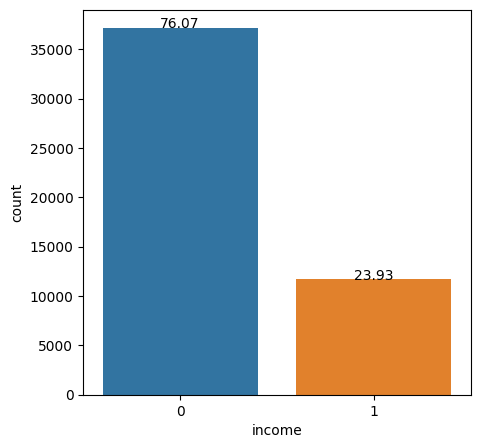

In [37]:
plt.figure(figsize=(5,5))
total = float(len(data) )

ax = sns.countplot(x = "income", data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [73]:
data['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

    In income there is Two groups. group1(who earns more than 20k) 76.07% belong to income and group2(who earns less than 20k) 23.93% belong to income.

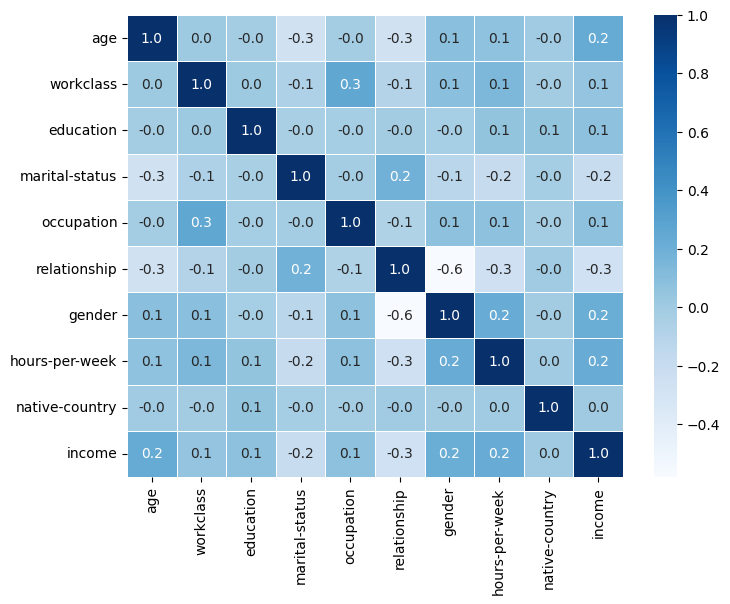

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

In [41]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

## 7. Data Splitting

In [42]:
x = data[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country']]
y = data['income']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [45]:
x.shape, y.shape

((48842, 9), (48842,))

In [46]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (34189, 9)
x_test:  (14653, 9)
y_train:  (34189,)
y_test:  (14653,)


## 8. Model Selection and Training

In [47]:
knn = KNeighborsClassifier(n_neighbors=9)

In [48]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [49]:
predict = knn.predict(x_test)
predict

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
knn.score(x_test, y_test)*100

80.17470825087013

## 9. Model Evaluation

In [51]:
print('Accuracy Score: ', accuracy_score(y_test, predict))

Accuracy Score:  0.8017470825087013


In [52]:
print('Precision Score: ', precision_score(y_test, predict))

Precision Score:  0.5936395759717314


In [53]:
print('Recall Score: ', recall_score(y_test, predict))

Recall Score:  0.5298165137614679


In [54]:
print('F1 Score: ', f1_score(y_test, predict))

F1 Score:  0.559915164369035


In [56]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     11165
           1       0.59      0.53      0.56      3488

    accuracy                           0.80     14653
   macro avg       0.73      0.71      0.72     14653
weighted avg       0.79      0.80      0.80     14653



In [57]:
cm = confusion_matrix(y_test, predict)
cm

array([[9900, 1265],
       [1640, 1848]])

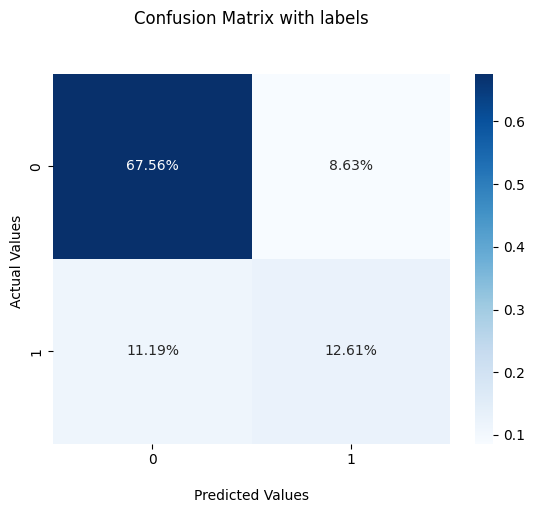

In [58]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

## Choosing a K value

In [60]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x, y, cv=10)
    accuracy_rate.append(score.mean())

In [61]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x, y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

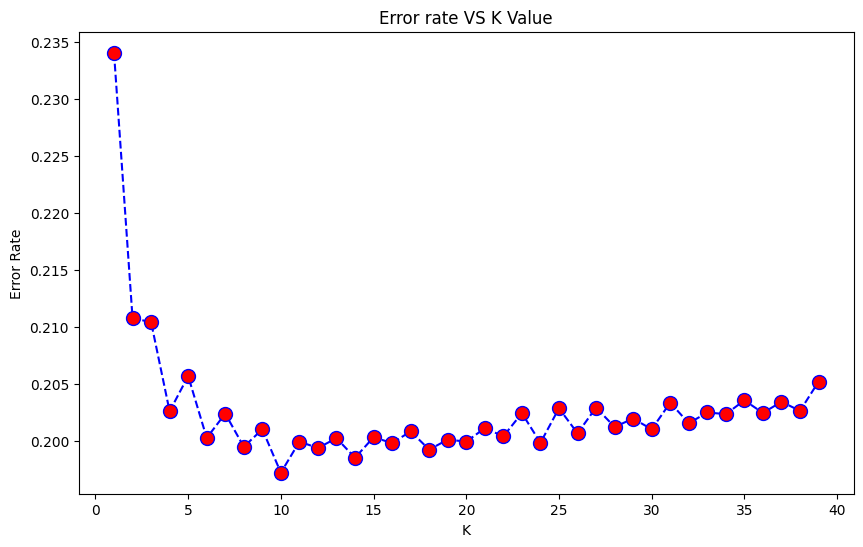

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

    In this error rate vs K value graph, the best performance K value is 10. And after the K value of 10, there are no more changes in this graph.

In [69]:
# First a quick comparison to our original K=10

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K = 10')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 10


[[10203   962]
 [ 1916  1572]]


              precision    recall  f1-score   support

           0       0.84      0.91      0.88     11165
           1       0.62      0.45      0.52      3488

    accuracy                           0.80     14653
   macro avg       0.73      0.68      0.70     14653
weighted avg       0.79      0.80      0.79     14653



In [68]:
# First a quick comparison to our original K = 1

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 1


[[9356 1809]
 [1620 1868]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.85     11165
           1       0.51      0.54      0.52      3488

    accuracy                           0.77     14653
   macro avg       0.68      0.69      0.68     14653
weighted avg       0.77      0.77      0.77     14653



## 10. Conclusion

In this Project, K-Nearest Neighbors (KNN) algorithm is a useful for analyzing adult income. The algorithm provides a simple and intuitive method for predicting income based on various features such as age, education, and occupation. The performance of KNN is dependent on the choice of the hyperparameters, such as the number of neighbors and distance metric, which can be optimized using cross-validation score.